## HiGHS example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import solver_factory, ModelOptions

### Initialize Triton

In [2]:
locations = load_repository()

In [3]:
L = locations.triton
capacity = 8

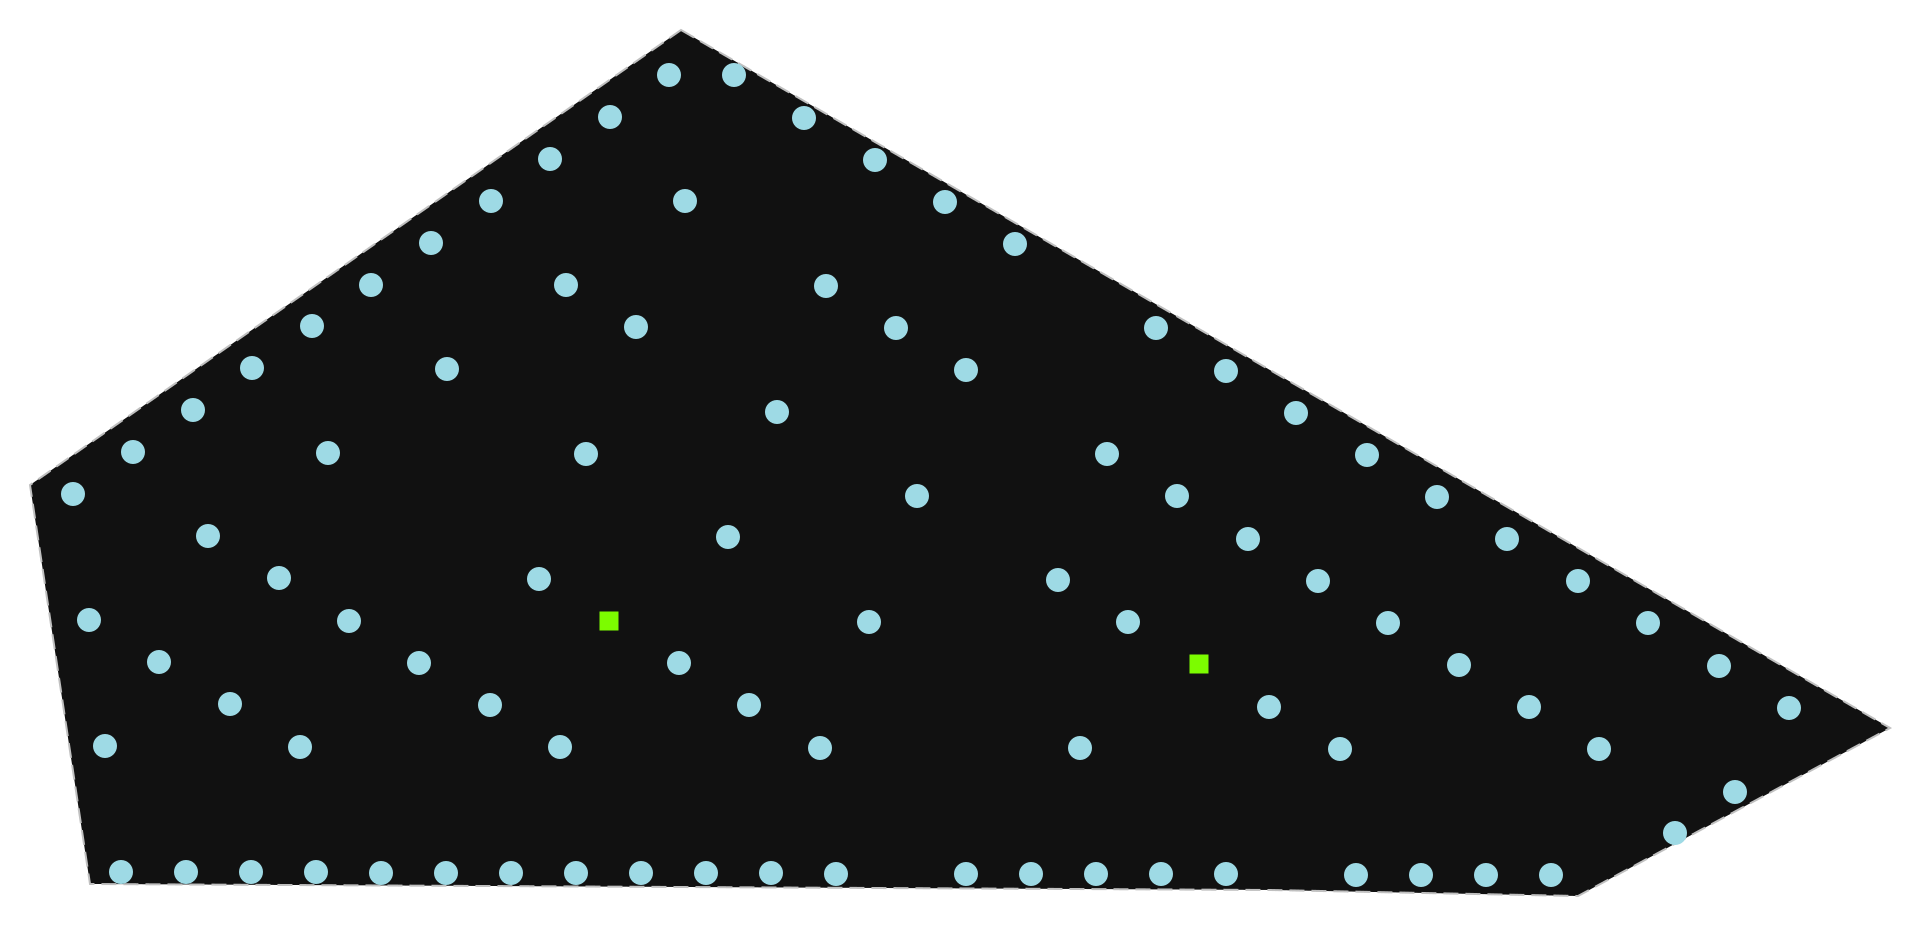

In [4]:
svgplot(L)

### Optimize Triton

In [5]:
P, A = make_planar_embedding(L)

Initial heuristic solution to warm-start the solver:

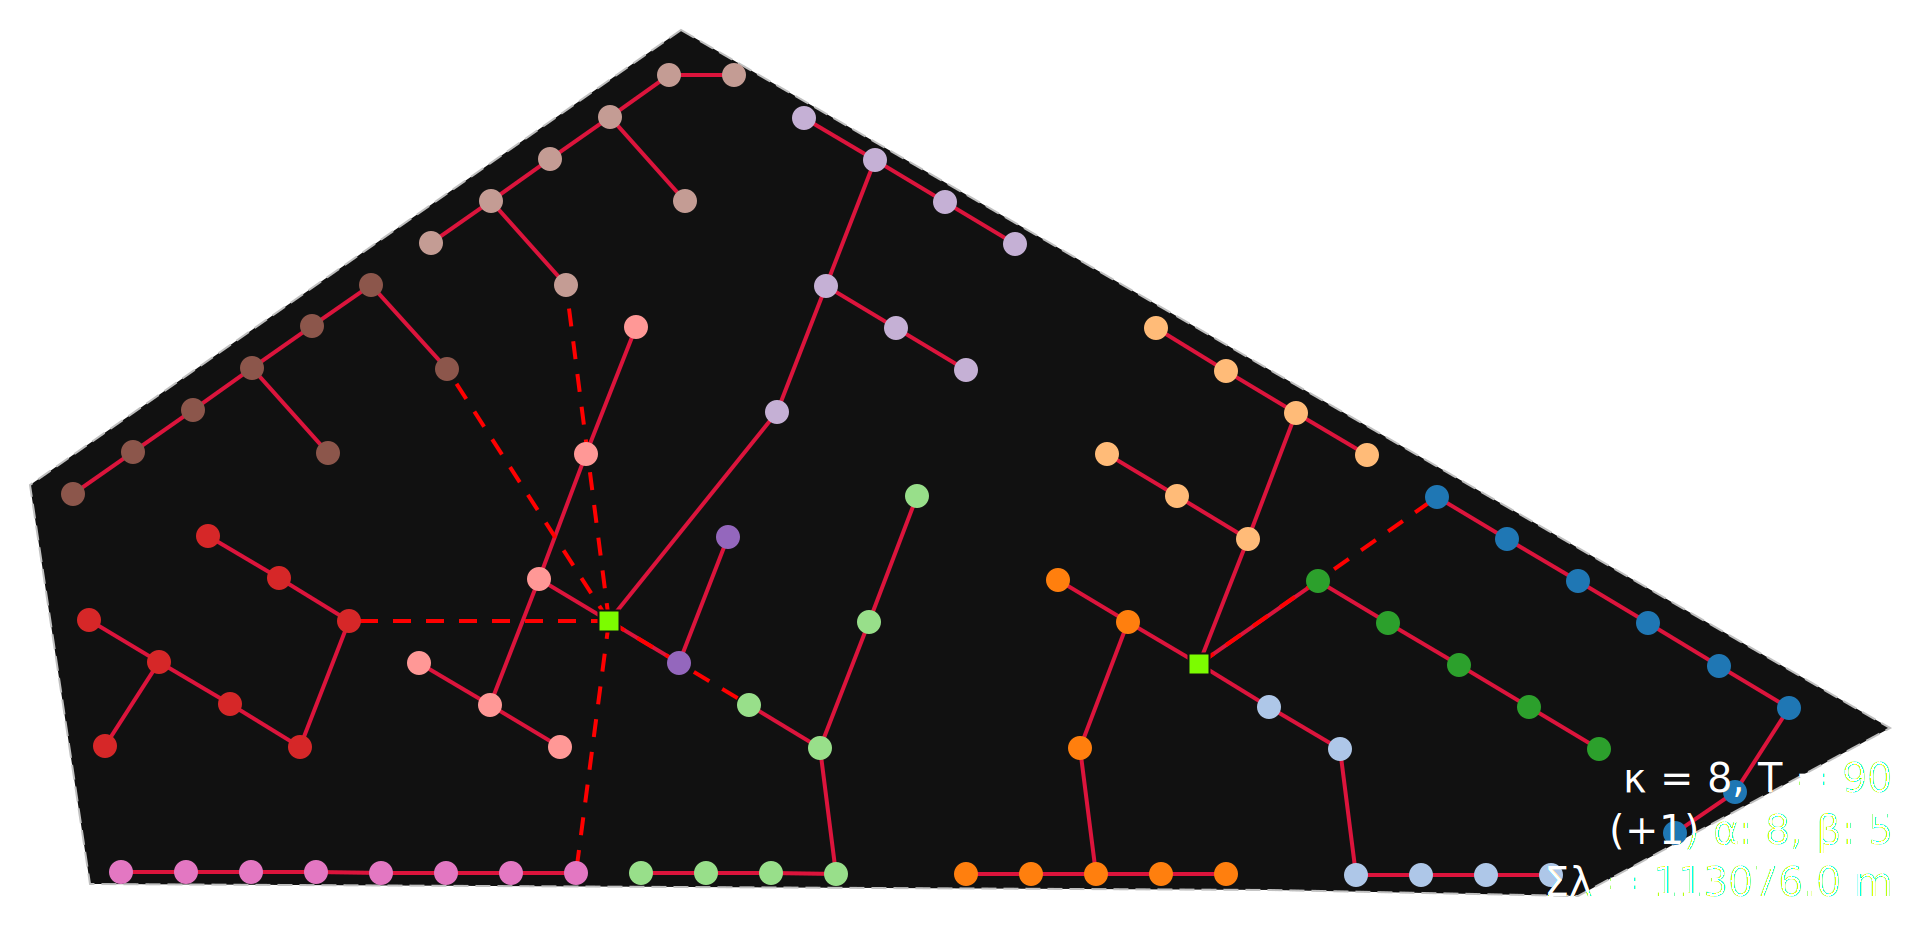

In [6]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [7]:
solver = solver_factory('highs')

In [8]:
solver.set_problem(
    P, A,
    capacity=Sʹ.graph['capacity'],
    model_options=ModelOptions(
        topology="branched",
        feeder_route="segmented",
        feeder_limit="unlimited",
    ),
    warmstart=Sʹ,
)

In [9]:
solver.solve(
    mip_gap=0.005,
    time_limit=60,
    verbose=True,
)

Running HiGHS 1.11.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
RUN!
MIP  has 2618 rows; 1764 cols; 9660 nonzeros; 1764 integer variables (882 binary)
Coefficient ranges:
  Matrix [1e+00, 8e+00]
  Cost   [8e+02, 1e+04]
  Bound  [1e+00, 8e+00]
  RHS    [1e+00, 9e+01]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
2618 rows, 1764 cols, 9660 nonzeros  0s
2320 rows, 1722 cols, 8634 nonzeros  0s

MIP start solution is feasible, objective value is 113076.197044

Solving MIP model with:
   2320 rows
   1722 cols (842 binary, 880 integer, 0 implied int., 0 continuous, 0 domain fixed)
   8634 nonzeros

Src: B => Branching; C => 

SolutionInfo(runtime=<pyomo.opt.results.container.UndefinedData object at 0x000001CA1B986ED0>, bound=104848.88924958107, objective=107622.0692857606, relgap=0.02576776356916277, termination='maxTimeLimit')

In [10]:
S, G = solver.get_solution()

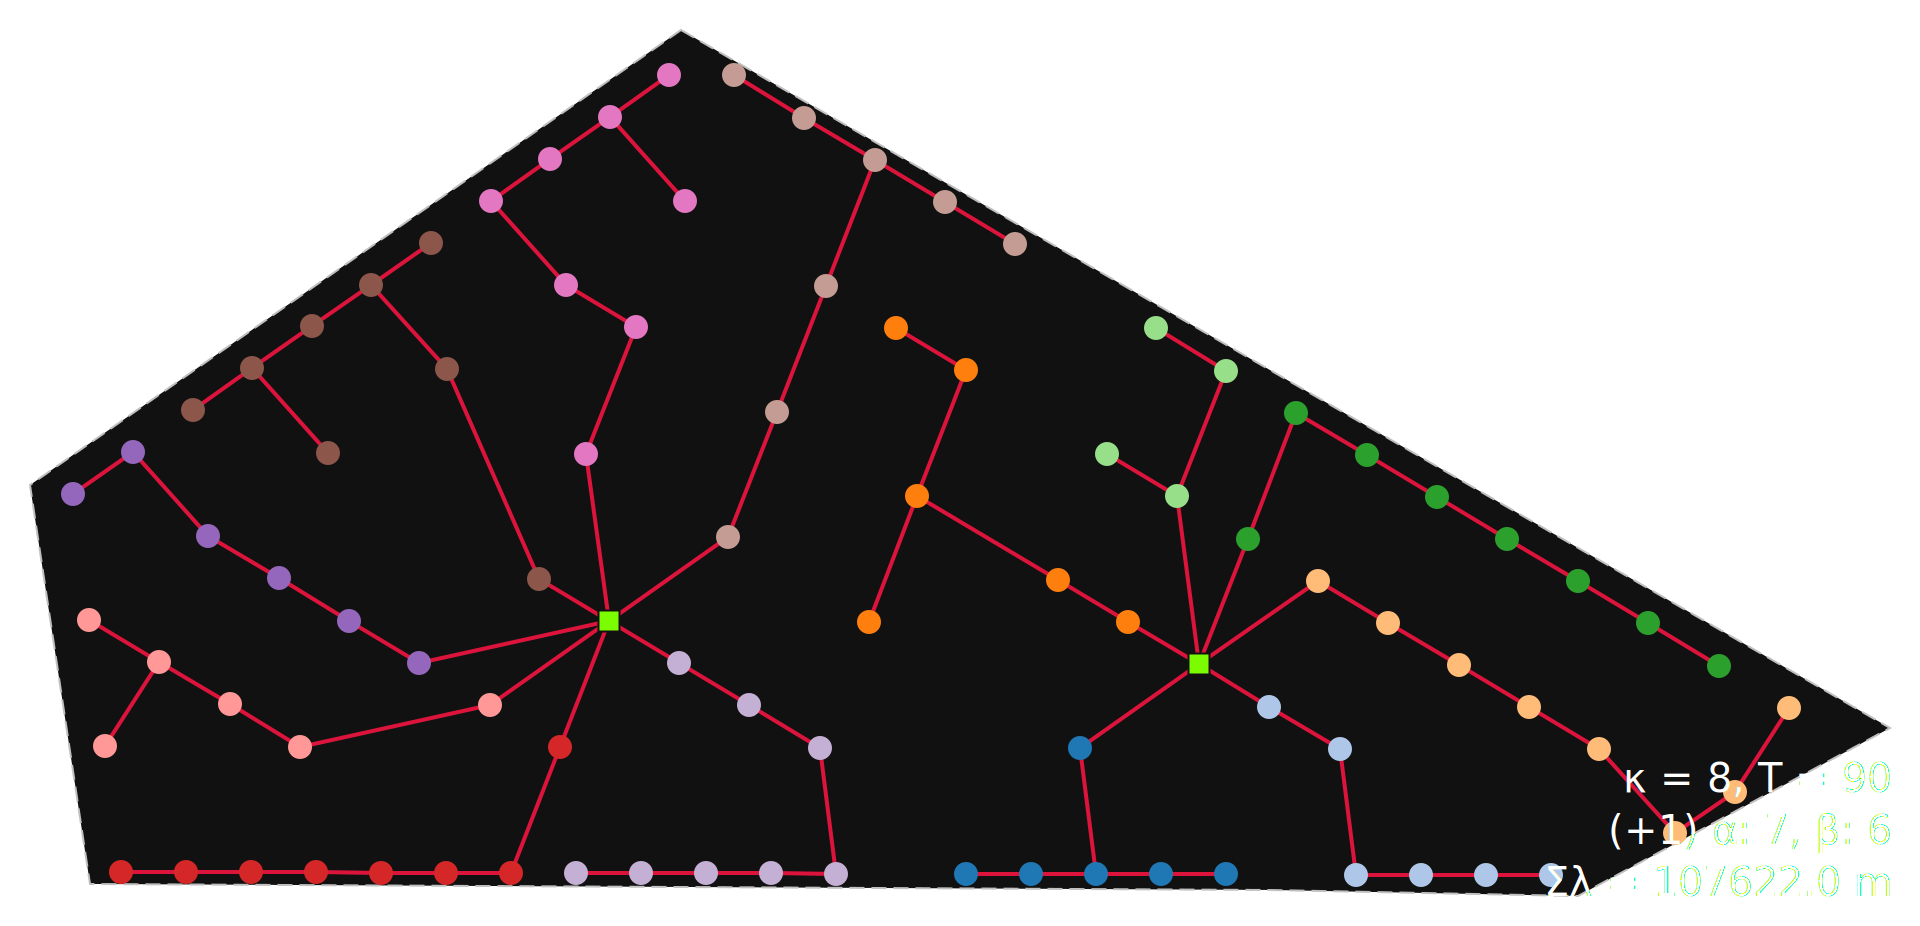

In [11]:
svgplot(G)